In [2]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# visualizing the dataset

df = pd.read_excel('Gita.xlsx')
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# changing the columns to lowercase

df.columns = [col.lower() for col in df.columns]

In [ ]:
df.drop('cust_id', axis=1, inplace=True)

In [ ]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# columns with null values

df.isnull().sum().sort_values(ascending=False).head()

minimum_payments          313
credit_limit                1
balance                     0
cash_advance_frequency      0
prc_full_payment            0
dtype: int64

In [ ]:
# assigning the median e mean to 'minimum_payments' and 'credit_limit' null values

df.loc[df.minimum_payments.isnull(), 'minimum_payments'] = df.minimum_payments.median()
df.loc[df.credit_limit.isnull(), 'credit_limit'] = df.credit_limit.mean()

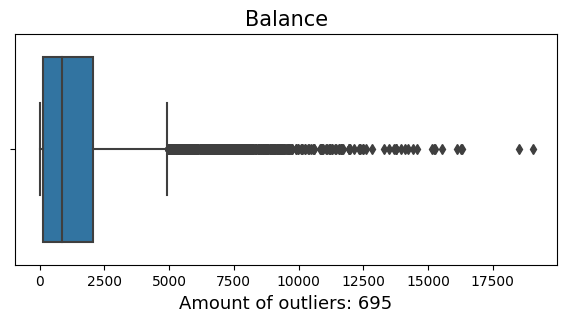

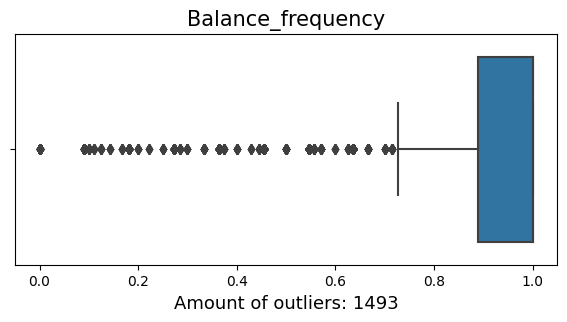

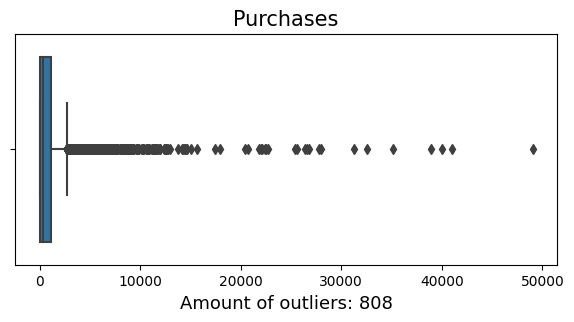

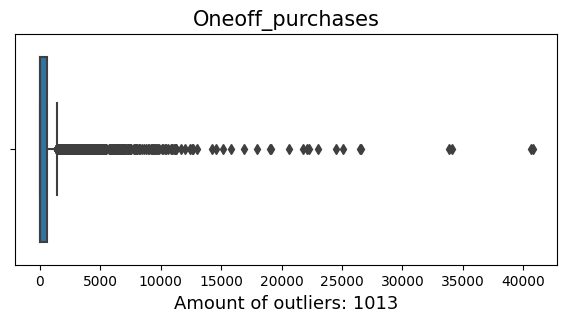

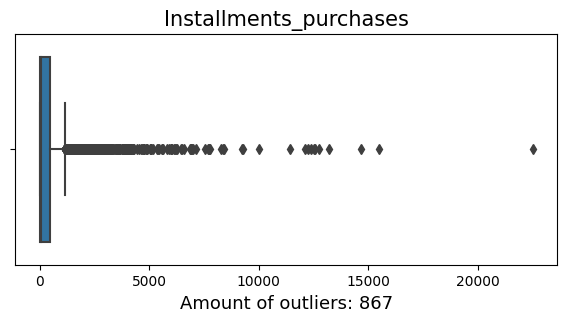

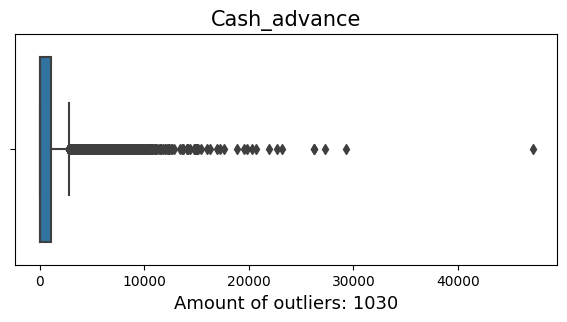

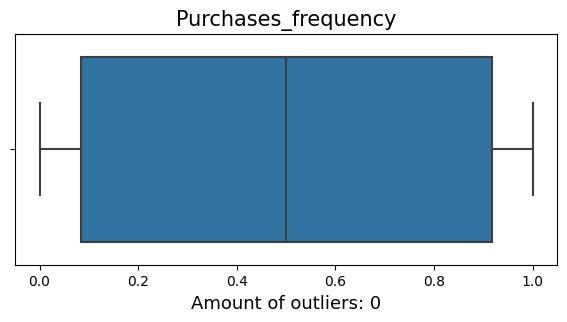

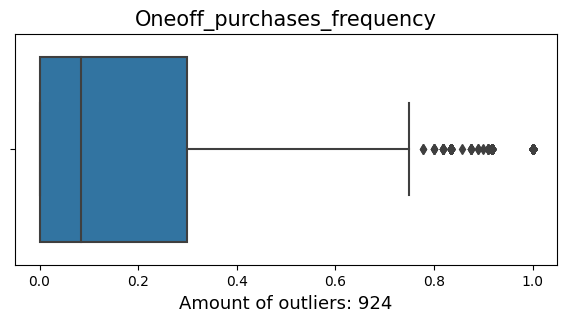

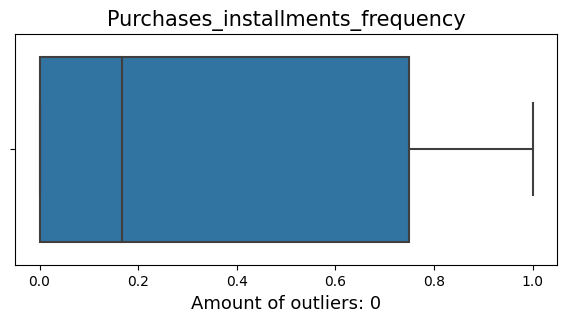

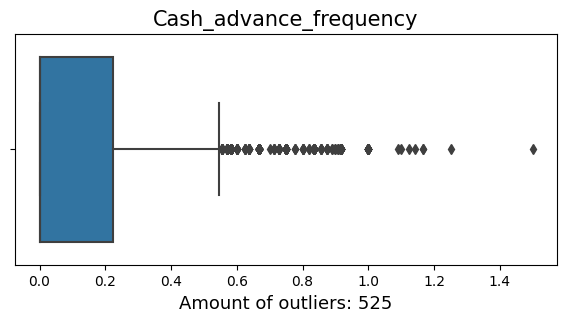

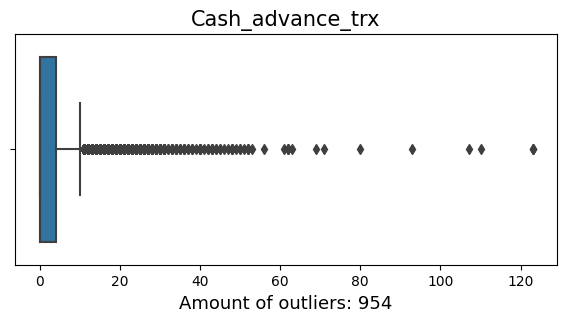

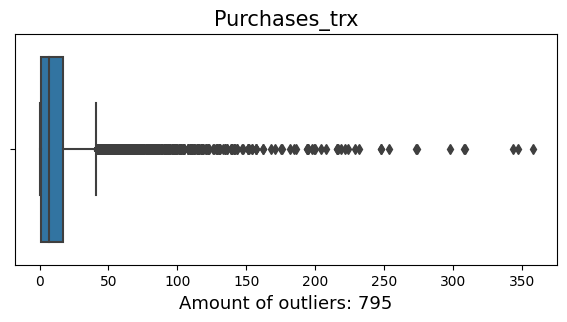

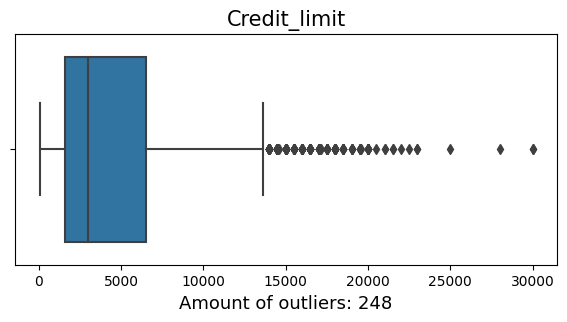

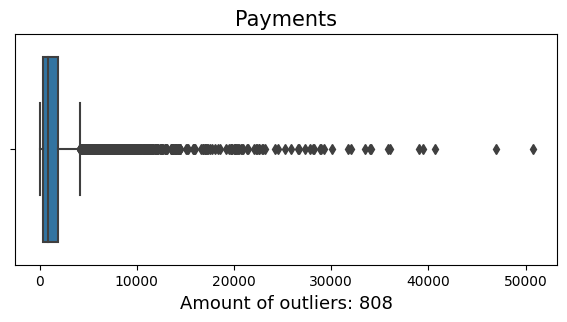

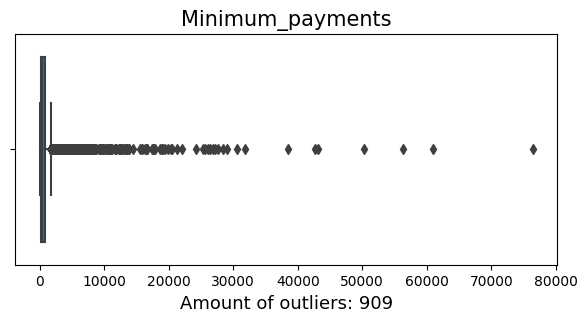

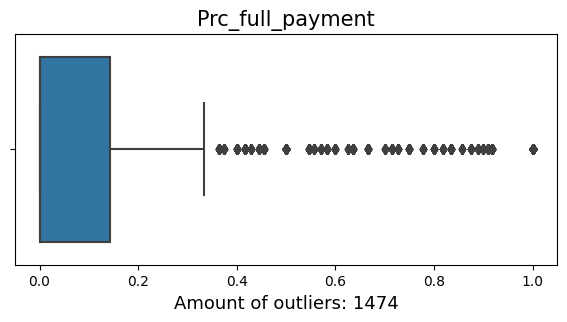

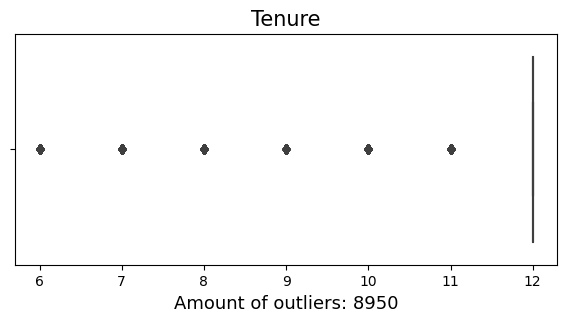

In [ ]:
# checking the outliers in each column

cont = 0
for col in df.columns:
    
    fig, ax = plt.subplots(figsize=(7, 3))
    
    sns.boxplot(x=df[col], ax=ax)

    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    
    ax.set_xlabel(f'Amount of outliers: {df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].shape[0]}', fontsize=13)
    ax.set_title(col.capitalize(), fontsize=15)
    
    cont += 1
    
    plt.show()

In [ ]:
range_df = df.copy()

In [ ]:
range_df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
range_cols = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit', 'payments', 'minimum_payments']

In [ ]:
# imputing the range of 1 to 7 where column values is money

for i in range_cols:
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 500), i] = 1
    range_df.loc[(range_df[i] > 500) & (range_df[i] <= 1000), i] = 2
    range_df.loc[(range_df[i] > 1000) & (range_df[i] <= 3000), i] = 3
    range_df.loc[(range_df[i] > 3000) & (range_df[i] <= 5000), i] = 4
    range_df.loc[(range_df[i] > 5000) & (range_df[i] <= 7000), i] = 5
    range_df.loc[(range_df[i] > 7000) & (range_df[i] <= 10000), i] = 6
    range_df.loc[(range_df[i] > 10000), i] = 7

In [ ]:
range_cols = ['balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'prc_full_payment']

In [ ]:
# imputing the range of 1 to 10 where column values is percentage

for i in range_cols:
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 0.1), i] = 1
    range_df.loc[(range_df[i] > 0.1) & (range_df[i] <= 0.2), i] = 2
    range_df.loc[(range_df[i] > 0.2) & (range_df[i] <= 0.3), i] = 3
    range_df.loc[(range_df[i] > 0.3) & (range_df[i] <= 0.4), i] = 4
    range_df.loc[(range_df[i] > 0.4) & (range_df[i] <= 0.5), i] = 5
    range_df.loc[(range_df[i] > 0.5) & (range_df[i] <= 0.6), i] = 6
    range_df.loc[(range_df[i] > 0.6) & (range_df[i] <= 0.7), i] = 7
    range_df.loc[(range_df[i] > 0.7) & (range_df[i] <= 0.8), i] = 8
    range_df.loc[(range_df[i] > 0.8) & (range_df[i] <= 0.9), i] = 9
    range_df.loc[(range_df[i] > 0.9) & (range_df[i] <= 1), i] = 10

In [ ]:
range_cols = ['cash_advance_trx', 'purchases_trx']

In [ ]:
range_df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,2,2.0,1.0,1.0,0.0,12
1,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,4,0,5.0,4.0,3.0,3.0,12
2,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,12,6.0,2.0,2.0,0.0,12
3,3.0,7.0,3.0,3.0,0.0,1.0,10.0,10.0,0.0,10.0,1,1,6.0,0.0,1.0,0.0,12
4,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12


In [ ]:
# normalizing the datas

scale = StandardScaler()
X = scale.fit_transform(range_df)

In [ ]:
# reducing dimensionality with PCA

pca = PCA(2)
cosine = cosine_similarity(X)

pca_results = pca.fit_transform(cosine)
pca_results.shape
print(pca_results)

[[  0.50070992 -29.68898922]
 [ 35.1290127   18.39569726]
 [-12.10281402  14.42644032]
 ...
 [ -3.79101935 -19.45687186]
 [ 19.62812705 -18.42322022]
 [ -2.33875808  -2.38108402]]


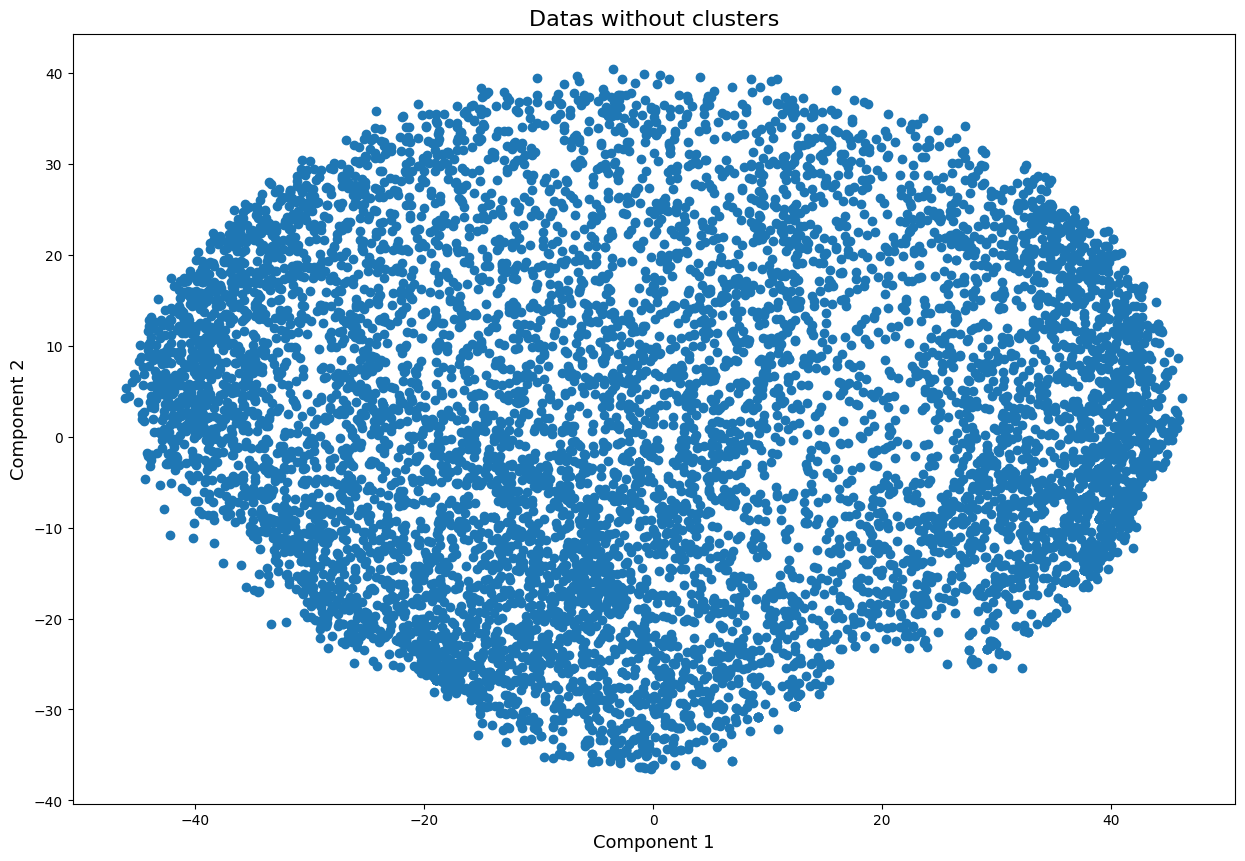

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(pca_results[:, 0], pca_results[:, 1])

ax.set_title('Datas without clusters', fontsize=16)

ax.set_xlabel('Component 1', fontsize=13)
ax.set_ylabel('Component 2', fontsize=13)

plt.show()

In [ ]:
n_clusters = list()
sse = list()

for i in range(1, 20):
    kmeans = KMeans(i, n_init=10, random_state=0).fit(pca_results)
    n_clusters.append(i)
    sse.append(kmeans.inertia_)

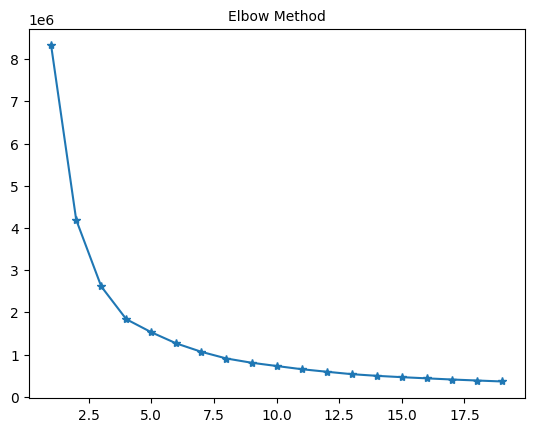

In [ ]:
fig, ax = plt.subplots()

ax.plot(n_clusters, sse, marker='*')

ax.set_title('Elbow Method', fontsize=10)

plt.show()

In [ ]:
n_cluster = 4

In [ ]:
kmeans = KMeans(n_cluster, n_init=10, random_state=0).fit(pca_results)

In [ ]:
label = kmeans.labels_

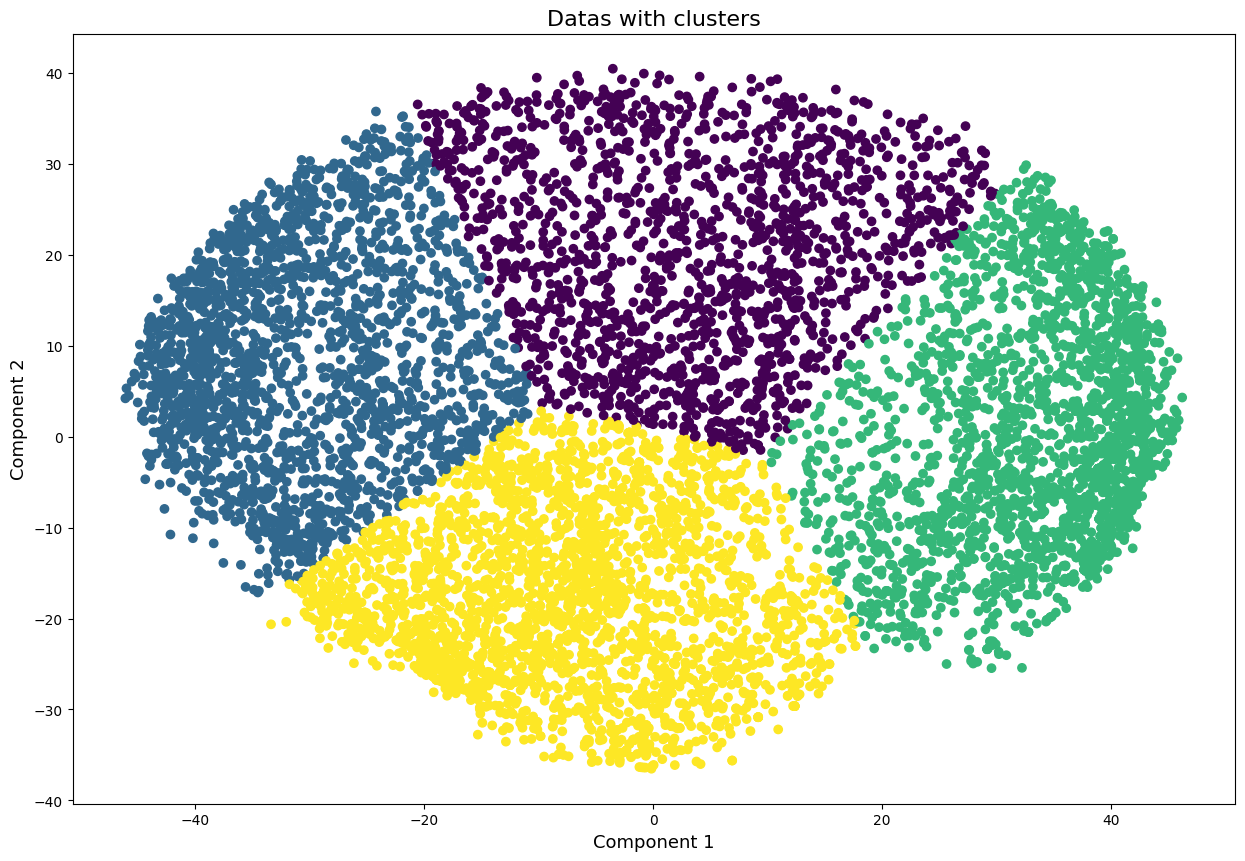

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(pca_results[:, 0], pca_results[:, 1], c=label)

ax.set_title('Datas with clusters', fontsize=16)

ax.set_xlabel('Component 1', fontsize=13)
ax.set_ylabel('Component 2', fontsize=13)

plt.show()